In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# **Importing the data**

**Training Data**

In [2]:
train_data=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
train_data.head(3)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...


In [3]:
train_data.shape

(13636, 15)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


**Test Data**

In [5]:
test_data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
test_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


# **Statistics of the Data**

In [6]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,13636.0,1.210853e+02,1.169956e+02,0.000000e+00,4.500000e+01,9.100000e+01,1.480000e+02,7.240000e+02
RecipeNumber,13636.0,3.862438e+01,2.967235e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.300000e+01,1.000000e+02
RecipeCode,13636.0,2.178599e+04,2.388319e+04,3.860000e+02,6.504000e+03,1.460000e+04,3.312100e+04,1.917750e+05
UserReputation,13636.0,2.160311e+00,1.008642e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+02
CreationTimestamp,13636.0,1.623713e+09,5.444020e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
ReplyCount,13636.0,1.452039e-02,1.373234e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
ThumbsUpCount,13636.0,1.098269e+00,4.166487e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01
ThumbsDownCount,13636.0,5.437078e-01,3.265660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
Rating,13636.0,4.288721e+00,1.544839e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
BestScore,13636.0,1.531279e+02,1.409869e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


# Checking For ***Null Values***

In [7]:
train_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [8]:
test_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

Dropping all the rows with missing value

In [9]:
train_data.dropna(inplace=True)

# **Dummy Classifier**

In [10]:
# df= pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
# X=df.drop("Rating", axis=1)
# y=df["Rating"]

# from sklearn.dummy import DummyClassifier
# model = DummyClassifier(strategy="most_frequent").fit(X,y)

# X_test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
# y_pred = model.predict(X_test)

# submission = pd.DataFrame({"ID": range(1,4547),
#                           "total_amount": y_pred})

# submission.to_csv('submission.csv', index=False)

Dummy Classifier gave the score **0.76066** 

# **EXPLORATORY DATA ANALYSIS**

# ***User Reputation Vs Ratings***

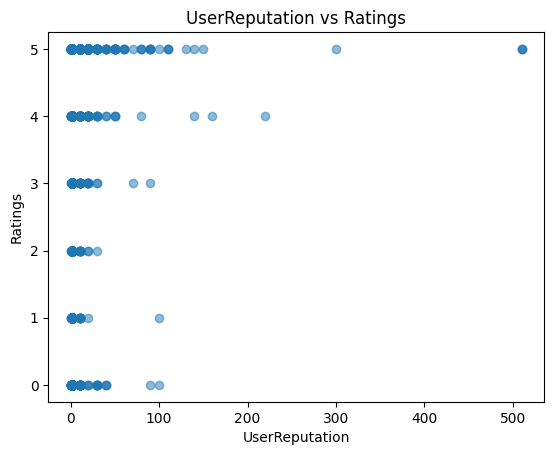

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(train_data['UserReputation'], train_data['Rating'], alpha=0.5)
plt.title('UserReputation vs Ratings')
plt.xlabel('UserReputation')
plt.ylabel('Ratings')
plt.show()

# ***Box Plot of Ratings***

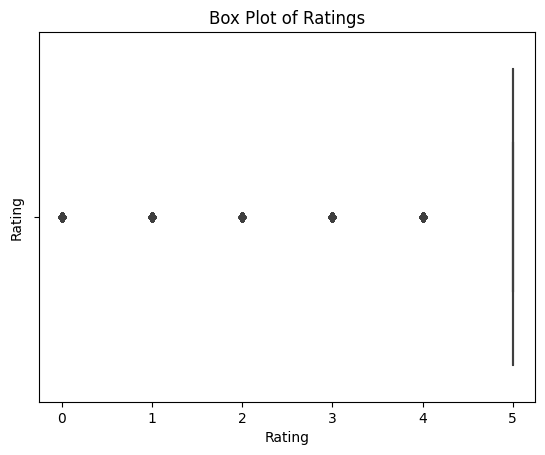

In [12]:
sns.boxplot(x=train_data['Rating'])
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()

# ***Histogram showing the Distribution of Ratings***

Text(0.5, 1.0, 'Distribution of Ratings')

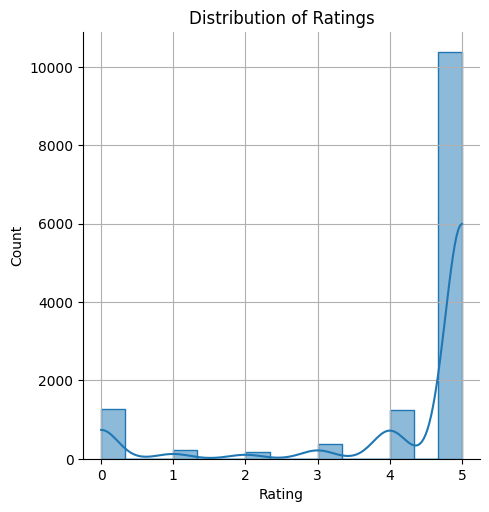

In [13]:
sns.displot(data = train_data , x = 'Rating' ,  kde=True, element="step", common_norm=False)
plt.xlabel('Rating')
plt.grid()
plt.title('Distribution of Ratings')

# ***Bar Graph for the Distribution of Rating***

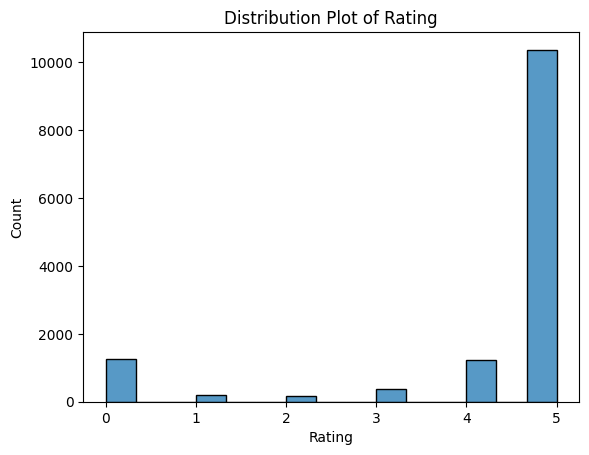

<Figure size 640x480 with 0 Axes>

In [14]:
sns.histplot(data=train_data, x='Rating')
plt.title('Distribution Plot of Rating')
plt.xlabel('Rating')
plt.show()
plt.clf()

# **Feature Engineering**

# **Correlation**

In [15]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr

label_encoder = LabelEncoder()
train_data['RecipeName_encoded'] = label_encoder.fit_transform(train_data['RecipeName'])

point_biserial_corr, p_value = pointbiserialr(train_data['RecipeName_encoded'], train_data['Rating'])

print("Point-Biserial Correlation:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation: -0.0032907057980276445
P-value: 0.7008271396480329


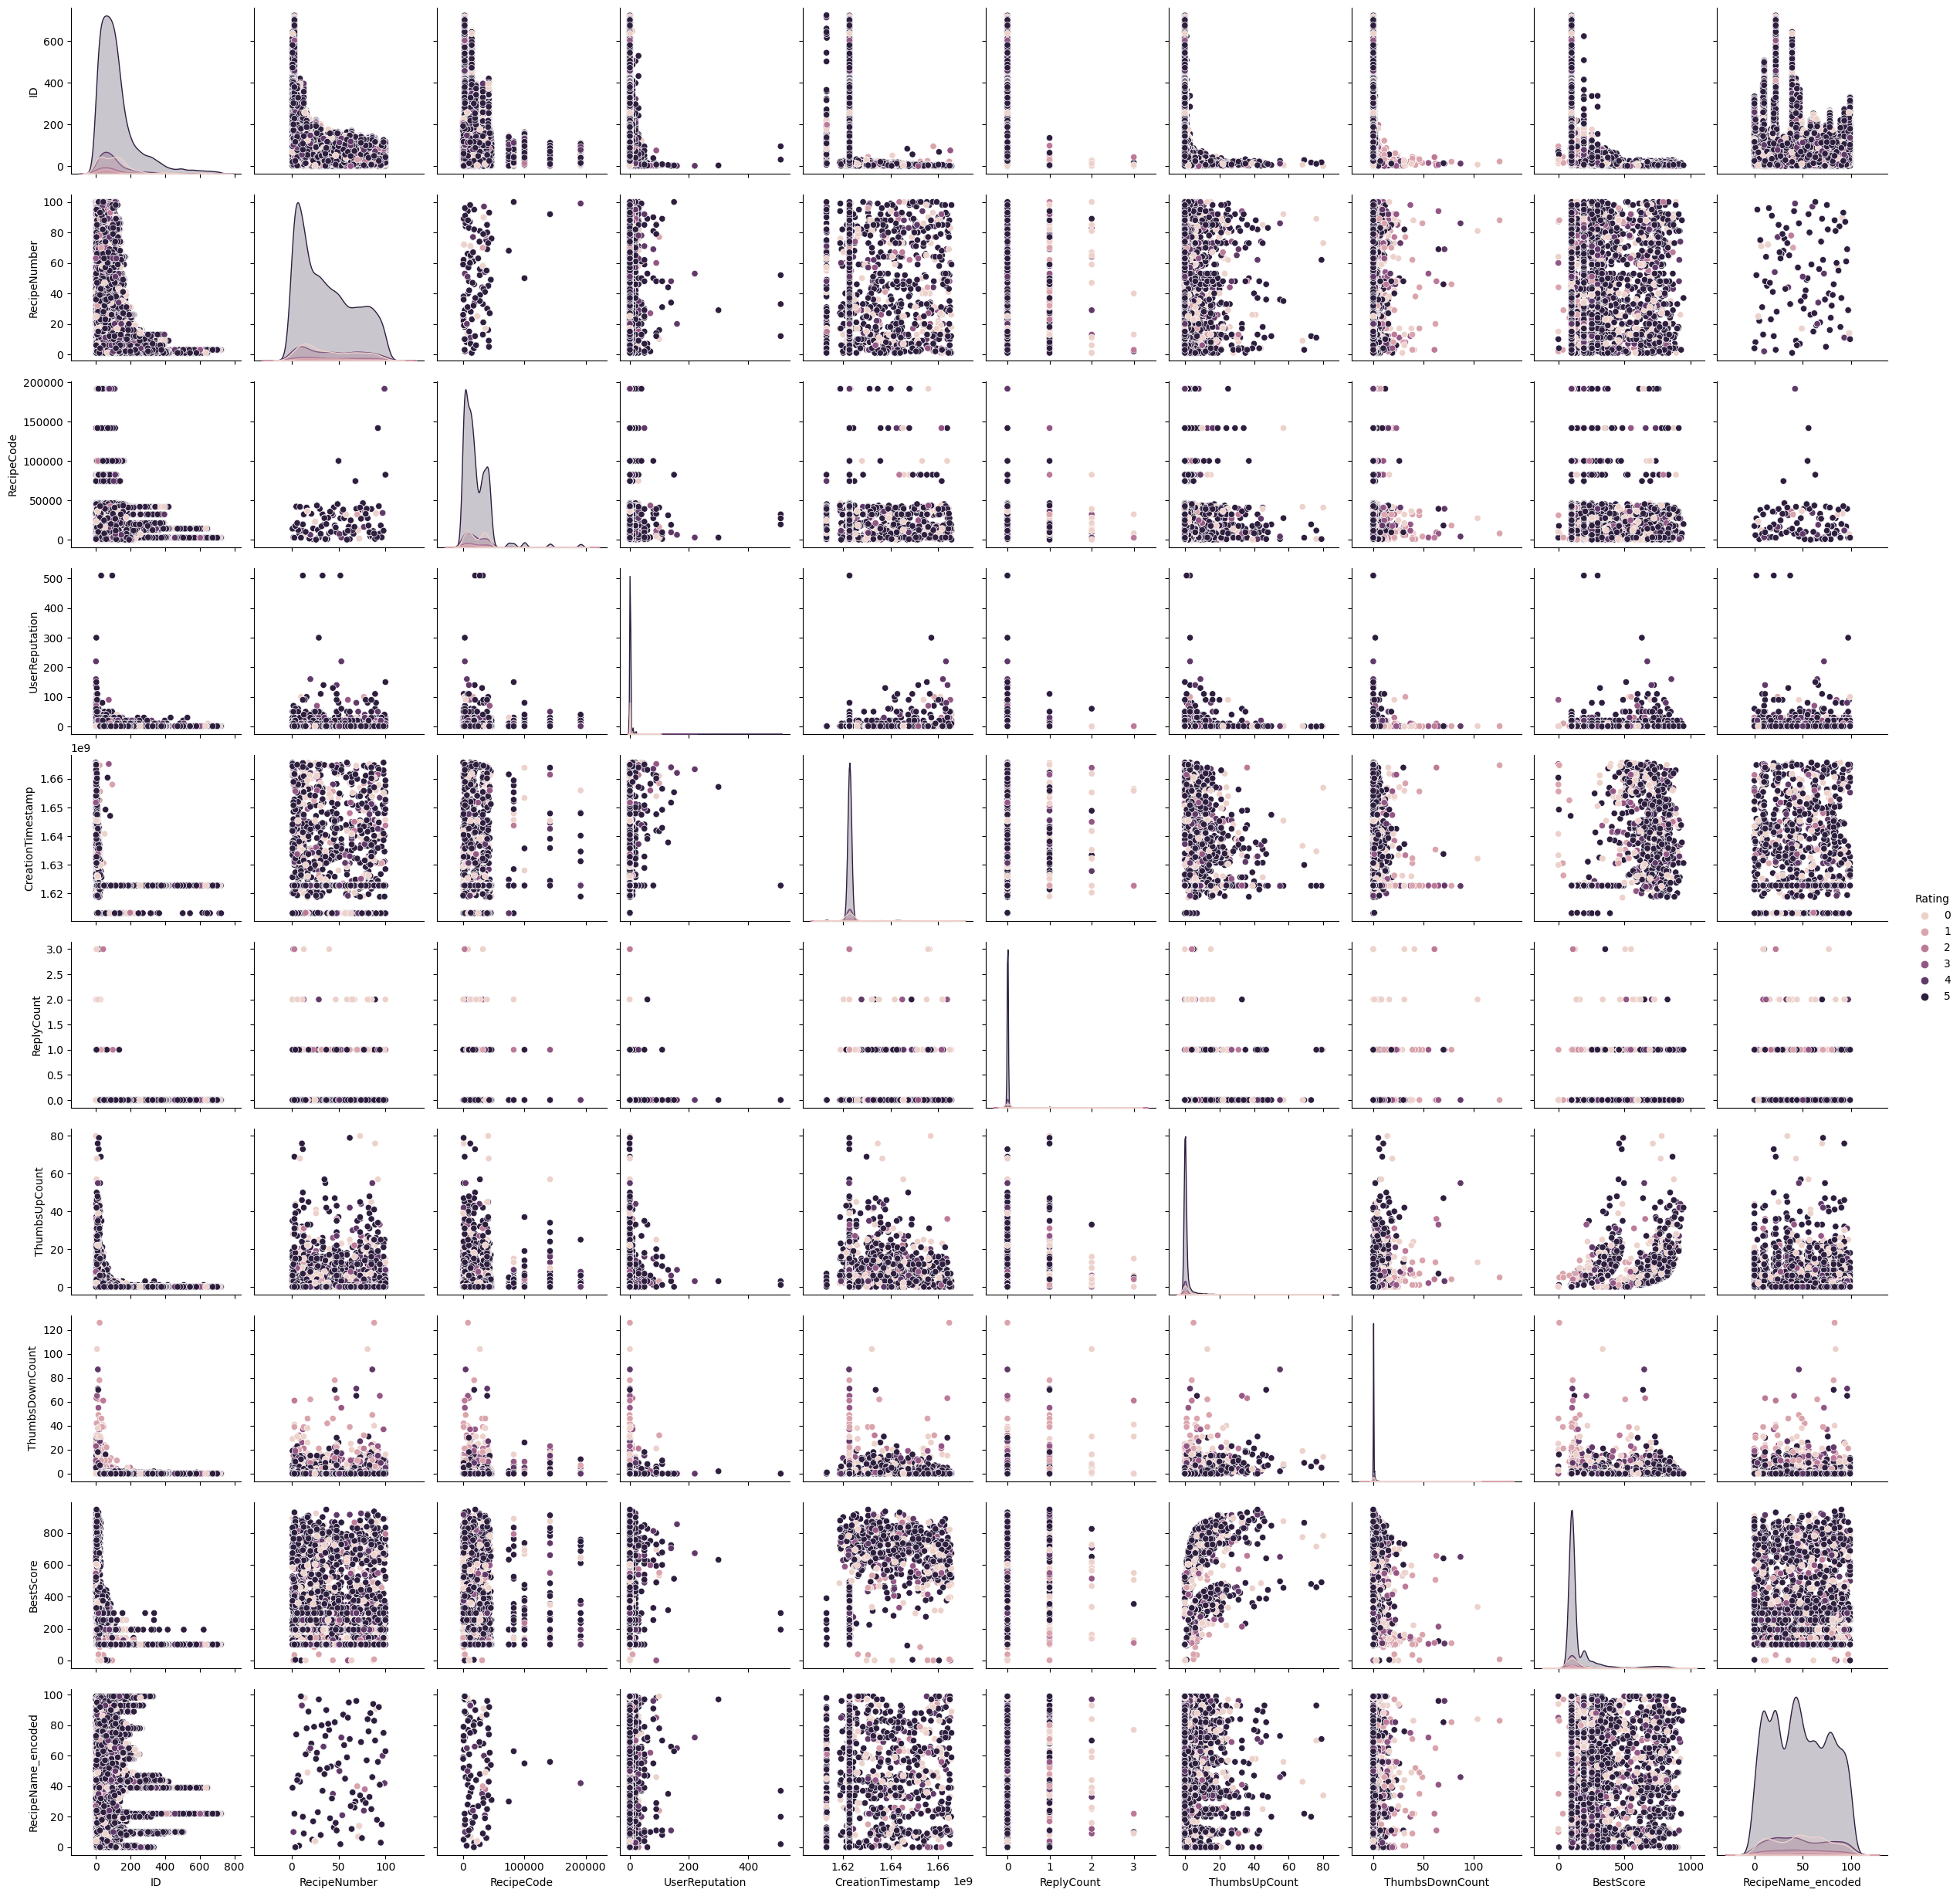

In [16]:
sns.pairplot(train_data ,  hue ='Rating')
plt.show()

# ***Correlation Heatmap***

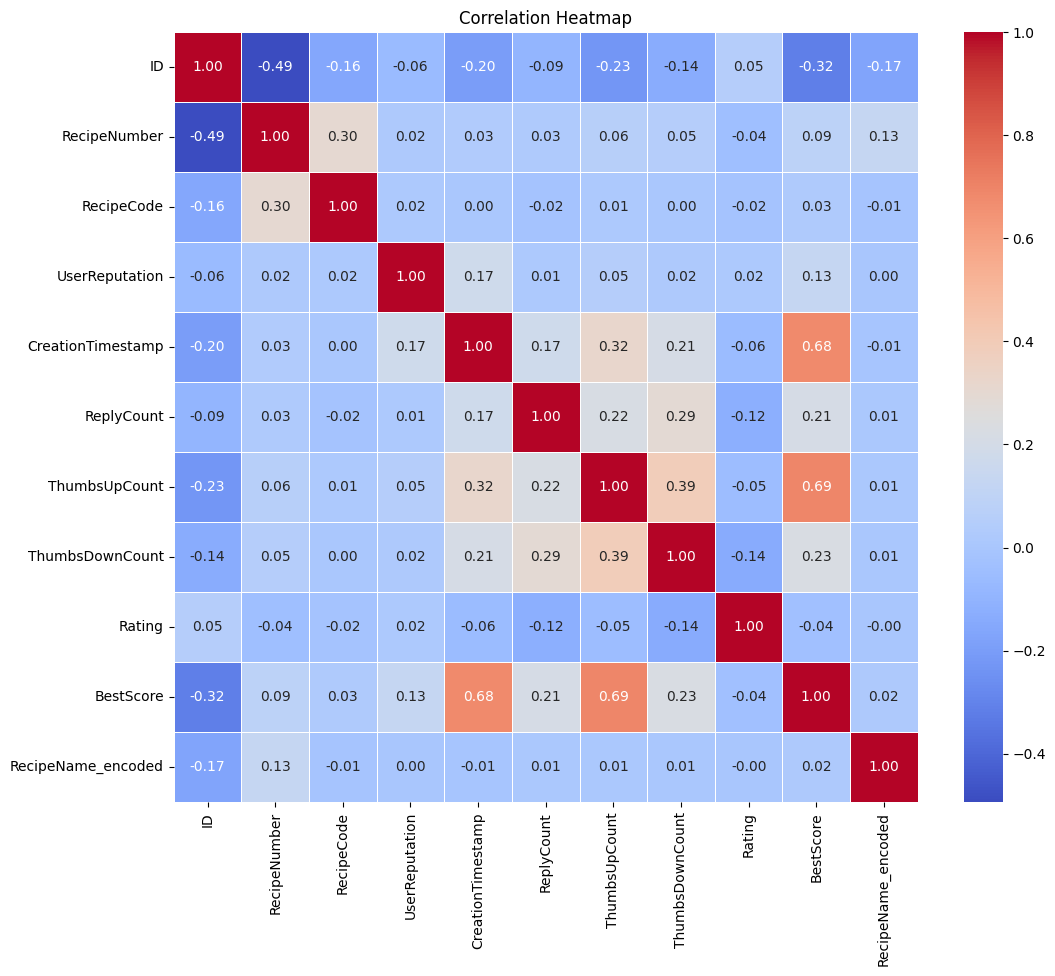

In [17]:
num_col = train_data.select_dtypes(include=['int64']).columns
correlation_matrix = train_data[num_col].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.6)
plt.title('Correlation Heatmap')
plt.show()

# ***Introducing "LikeRatio"***

"LikeRatio" is the ratio of ThumbsUpCount and ThumbsDownCount

In [18]:
train_data['LikeRatio'] = train_data['ThumbsUpCount']/train_data['ThumbsDownCount']
test_data['LikeRatio'] = test_data['ThumbsUpCount']/test_data['ThumbsDownCount']

# ***Replacing null values***

In [19]:
train_data['LikeRatio'] = train_data['LikeRatio'].fillna(0)
test_data['LikeRatio'] = test_data['LikeRatio'].fillna(0)

# ***Word Count(Frequency Wise)***

Counting the frequency of each word in "Recipe_Review" to find which words are **"IRRELEVANT"** in the process of review rating

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

user_reviews = train_data['Recipe_Review']

count_vectorizer = CountVectorizer(stop_words='english')
cv_matrix = count_vectorizer.fit_transform(user_reviews)

word_freq = pd.DataFrame(cv_matrix.sum(axis=0), columns = count_vectorizer.get_feature_names_out())
word_freq = word_freq.transpose()
word_freq.columns = ['Count']

pd.set_option('display.max_rows', None)


highest_words = word_freq.sort_values(by='Count', ascending=False).head(100)
print("Word Frequency- Highest to Lowest")
print(highest_words)

Word Frequency- Highest to Lowest
             Count
recipe        7454
39            7210
make          4470
used          3233
good          2771
time          2411
delicious     2361
great         2261
added         2141
easy          2110
just          2043
family        1950
use           1933
like          1789
loved         1699
cake          1481
love          1460
add           1444
did           1442
soup          1404
instead       1377
34            1343
cheese        1315
really        1286
chicken       1265
sugar         1254
sauce         1246
making        1240
bread         1222
cream         1148
little        1119
best          1101
didn          1050
ve            1036
husband       1032
flavor        1028
definitely    1021
taste          959
cup            940
half           926
pie            788
amp            778
try            777
flour          765
perfect        732
favorite       729
don            723
times          681
moist          654
wonderful      6

**Here, We can see that there are two Integer Numbers like 39 and 34. These Integer numbers are of no use. So we should remove them.**

In [21]:
train_data['Recipe_Review'] = train_data['Recipe_Review'].str.replace('34', '')
test_data['Recipe_Review'] = test_data['Recipe_Review'].str.replace('34', '')

train_data['Recipe_Review'] = train_data['Recipe_Review'].str.replace('39', '')
test_data['Recipe_Review'] = test_data['Recipe_Review'].str.replace('39', '')

**Similiarly we will do the same with "recipe" and "Recipe"**

In [22]:
common_words = ['recipe','cake','soup','chicken']
train_data['Recipe_Review'] = train_data['Recipe_Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in common_words]))
test_data['Recipe_Review'] = test_data['Recipe_Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in common_words]))

**Let us drop the rows ID,RecipeName and RecipeNumber because we already have RecipeCode for identifying particular recipies. CommentID, UserName, Rating, CreationTimeStamp are not relevant for predicting the Rating.**

In [23]:
train_data.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review', 'RecipeName_encoded', 'LikeRatio'],
      dtype='object')

In [24]:
drop_columns =['ID','RecipeName','RecipeNumber','CommentID','UserName','Rating', 'CreationTimestamp','ThumbsUpCount','ThumbsDownCount']
X = train_data.drop(drop_columns, axis = 1)
y = train_data['Rating']
X.head()

,RecipeCode,UserID,UserReputation,ReplyCount,BestScore,Recipe_Review,RecipeName_encoded,LikeRatio
0,12259,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,20,0,100,great recipe! I have made them just as written...,7,0.0
1,8202,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,1,0,100,This is an easy and quick that is great for th...,83,0.0
2,2832,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,1,0,100,I think I was looking for something extra spec...,22,0.0
3,100276,u_1oKZCQcKQZdQhDVBS7oISc216VA,1,0,100,This is our favorite grilled recipe. Great fla...,55,0.0
4,19731,u_1oKd4sudZQPgu6YALiC7bW7mKMs,1,0,100,Great basic recipe. I added 2 teaspoons Tuscan...,20,0.0


In [25]:
y.head()

0    5
1    5
2    3
3    5
4    4
Name: Rating, dtype: int64

In [26]:
test_data = test_data.drop(['ID','RecipeName','RecipeNumber','CommentID','UserName', 'CreationTimestamp','ThumbsUpCount','ThumbsDownCount'], axis = 1)
test_data.shape

(4546, 7)

# Implementing **PIPELINE**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [28]:
X.columns

Index(['RecipeCode', 'UserID', 'UserReputation', 'ReplyCount', 'BestScore',
       'Recipe_Review', 'RecipeName_encoded', 'LikeRatio'],
      dtype='object')

In [29]:
text_column = 'Recipe_Review'

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown ='ignore'))
])

text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_column),
        ('cat', categorical_transformer, ['RecipeCode', 'UserID'])
    ])

# **MODELS**

In [31]:
test_data.shape

(4546, 7)

# ***Decision Tree***

A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively partitioning the data into subsets based on the features that best separate the target variable. At each step, the algorithm selects the feature that provides the best split, typically using measures like Gini impurity or information gain. This process continues until a stopping criterion is met, such as reaching a maximum depth or purity level. The resulting tree structure can then be used to make predictions on new data by following the path from the root node to a leaf node, where a decision or prediction is made based on the majority class or average value of the instances in that node.

In [32]:
# from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier()

# dt_clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', clf)
# ])

# dt_clf.fit(X_train, y_train)

# # Predict using the pipeline
# y_pred = dt_clf.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [33]:
# test_pred = dt_clf.predict(test_data)
# submission_dtc = pd.DataFrame({"ID": range(1, len(test_pred) + 1),
#                                 "Rating": test_pred})
# submission_dtc.to_csv('submission.csv',index =  False)

# print(len(test_pred))

# ***Random Forest Classifier***

A Random Forest Classifier is an ensemble learning method that builds multiple decision trees during training. Each tree is trained on a random subset of the training data and a random subset of the features.During prediction, each tree "votes" on the class label of the input data, and the most common class label among all the trees is chosen as the final prediction. This averaging or voting process helps reduce overfitting and increases the model's accuracy and robustness.By combining multiple trees that are trained on different subsets of data, Random Forest can handle complex relationships in the data and provide more accurate predictions compared to individual decision trees. It's a powerful and widely used algorithm in machine learning for classification tasks.

In [34]:
# from sklearn.ensemble import RandomForestClassifier

# ranf_model = RandomForestClassifier()
# ranf_clf = Pipeline(steps = [('preprocessor', preprocessor),
#                              ('classifier', ranf_model)])

# ranf_clf.fit(X_train,y_train)
# y_pred = ranf_clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [35]:
# test_pred = ranf_clf.predict(test_data)
# submission_rfc = pd.DataFrame({"ID": range(1, len(test_pred) + 1),
#                                 "Rating": test_pred})
# submission_rfc.to_csv('submission.csv', index = False)
# submission_rfc.head()

# ***KNN***

K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for classification and regression tasks.Here we are using KNN for Classification. Reasons for using KNN are:
1. It stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions like Euclidean, Manhattan, etc.).
2. When a new data point is to be classified, KNN calculates the distance between that point and all other points in the dataset.
3. It then selects the K nearest data points (neighbors) based on the calculated distances.
4. The class label of the majority of these K neighbors is assigned to the new data point.

KNN doesn't involve explicit training. Instead, it stores the entire dataset and performs computations at the time of prediction, which can be computationally expensive for large datasets. However, it's easy to implement and understand, making it a popular choice for small to medium-sized datasets.

In [36]:
# from sklearn.neighbors import KNeighborsClassifier

# model_knn = KNeighborsClassifier(n_neighbors=5)

# knn_clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', model_knn)])

# knn_clf.fit(X_train, y_train)
# y_pred = knn_clf.predict(X_test)

# accuracy = accuracy_score(y_test,y_pred)
# print("Accuracy:",accuracy)

In [37]:
# test_pred = knn_clf.predict(test_data)
# submission_knn = pd.DataFrame({"ID": range(1, len(test_pred) + 1),
#                                 "Rating": test_pred})
# submission_knn.to_csv('submission.csv', index = False)

# test_pred.shape

# ***XG Boost***

XGBoost (Extreme Gradient Boosting) is a machine learning algorithm that sequentially builds an ensemble of decision trees to make predictions. It optimizes a specific objective function, incorporates regularization to prevent overfitting, estimates feature importance, and is known for its speed, scalability, and high accuracy.

In [38]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

In [39]:
# model_xgb = XGBClassifier()


# xgb_clf = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('classifier', model_xgb)])

# xgb_clf.fit(X_train, y_train)
# y_pred = xgb_clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy',accuracy)

In [40]:
# model_xgb = XGBClassifier()

# xgb_clf = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('classifier', model_xgb)])


# param_grid = {
#     'classifier__learning_rate': [0.01, 0.1, 0.2],  
#     'classifier__max_depth': [3, 5, 7],  
#     'classifier__n_estimators': [50, 100, 200], 
# }


# grid_search_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search_xgb.fit(X_train, y_train)


# best_xgb_clf = grid_search_xgb.best_estimator_
# y_pred = best_xgb_clf.predict(X_test)


# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy',accuracy)

In [41]:
# test_pred = best_xgb_clf.predict(test_data)
# submission_xgb = pd.DataFrame({"ID": range(1, len(test_pred) + 1),
#                                 "Rating": test_pred})
# submission_xgb.to_csv('submission.csv', index = False)

# test_pred.shape

# **SVM(SVC)**

In [42]:
# from sklearn.svm import SVC

In [43]:
# svc_model = SVC(kernel='linear')
# svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
#                          ('classifier', svc_model)])
# svc_clf.fit(X_train, y_train)
# y_pred = svc_clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy',accuracy)

# Hyperparameter Tuning 

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [45]:
svc_model = SVC()
svc_clf=Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', svc_model)])

param_grid = {
    'classifier__C': [0.1,1,10],
    'classifier__kernel':['linear','rbf'],
    'classifier__gamma':['scale','auto']
}

grid_search_svc = GridSearchCV(svc_clf, param_grid, cv = 3, scoring='accuracy', n_jobs = -1)
grid_search_svc.fit(X_train,y_train)

best_svc_clf = grid_search_svc.best_estimator_
y_pred = best_svc_clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)

Accuracy 0.7792445911257793


# **Logistic Regression**

In [46]:
# from sklearn.linear_model import LogisticRegression

In [47]:
# log_model = LogisticRegression(max_iter=1000)

# log_clf = Pipeline(steps=[('preprocessor',preprocessor),
#                           ('classifier',log_model)])
# log_clf.fit(X_train, y_train)
# y_pred = log_clf.predict(X_test)

# accuracy = accuracy_score(y_test,y_pred)
# print('Accuracy',accuracy)

In [48]:
# from sklearn.model_selection import cross_val_score,StratifiedKFold

# log_clf = Pipeline(steps=[('preprocessor',preprocessor),
#                           ('classifier', log_model)])
# crova_results = cross_val_score(log_clf, X_train, y_train, cv=5, scoring='accuracy')
# print('Cross Validation Accuracy',crova_results.mean())

In [49]:
# test_pred = grid_search.best_estimator_.predict(test_data)
# submission_logR = pd.DataFrame({"ID": range(1, len(test_pred) + 1),
#                                 "Rating": test_pred})
# submission_logR.to_csv('submission.csv', index = False)

# test_pred.shape

# **RESULTS**

**So after using Decision Tree, Random Forest Classifier, K-Nearest Neighbours, XG Boost and Support Vector Machine(Classifier), I found out that accuracy of SVC is the best.**

1. Decision Tree : 0.6846351301796846
2. Random Forest Classifier : 0.7752108544187752
3. K-Nearest Neighbours : 0.7341400806747341
4. Logistic Regression : 0.7785111844517785
4. XG Boost : 0.7755775577557755 
5. Support Vector Classifier : **0.7847451411807848**

# **Comparing the accuracy of models**

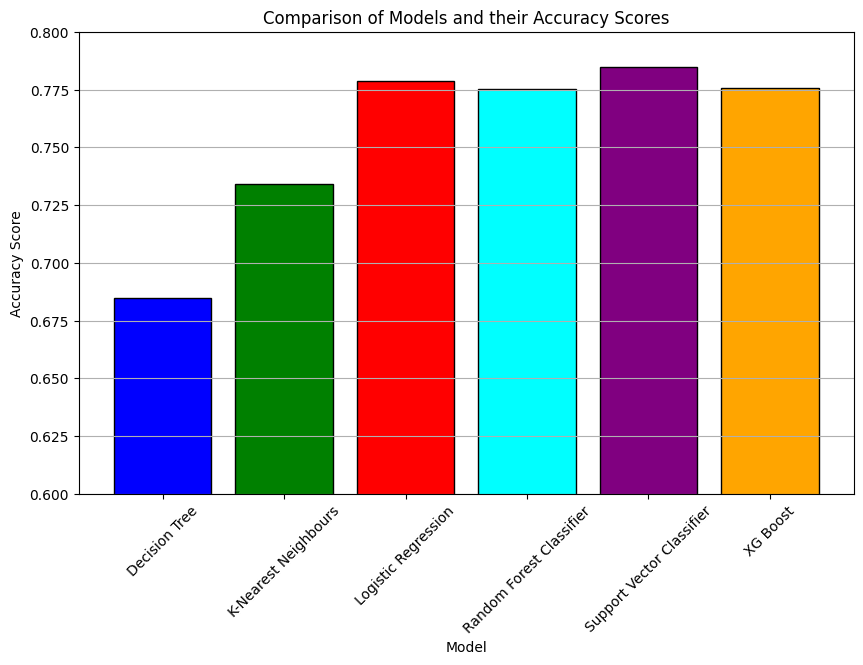

In [50]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'K-Nearest Neighbours','Logistic Regression','Random Forest Classifier','Support Vector Classifier','XG Boost']
scores = [0.6846351301796846,0.7341400806747341,0.7785111844517785,0.7752108544187752,0.7847451411807848, 0.7755775577557755 ]
plt.figure(figsize=(10,6))
plt.bar(models, scores, color=['blue','green','red','cyan','purple','orange'],edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Models and their Accuracy Scores')
plt.ylim(0.6,0.8)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# **Submitting predictions**

Since SVC is the most accurate model for the dataset, We submit the predictions of **best_svc_clf** to the competition

In [51]:
test_pred = best_svc_clf.predict(test_data)
submission_svc = pd.DataFrame({"ID": range(1, len(test_pred) + 1),
                                "Rating": test_pred})
submission_svc.to_csv('submission.csv', index = False)

test_pred.shape

(4546,)

The Final score is **0.78068**